In [1]:
#
import random
from keras.optimizers import SGD, Adagrad

from mnet_utils import dice_coef_loss, train_loader, mk_dir, return_list
import Model_MNet as DeepModel

result_path = mk_dir('./deep_model/')
# pre_model_file = './deep_model/Model_MNet_REFUGE.h5'
pre_model_file = './deep_model/Model_MNet_REFUGE_v2_wo_pretrain.h5.end'
save_model_file = result_path + 'Model_MNet_REFUGE_v2_wo_pretrain.h5'

root_path = '../../data/fundus-images/MESSIDOR/mnet_pt_data/'
train_data_path = root_path + 'train/images/'
train_mask_path = root_path + 'train/masks/'

val_data_path = root_path + 'validation/images/'
val_mask_path = root_path + 'validation/masks/'

# load training data
train_list = return_list(train_data_path, '.png')
val_list = return_list(val_data_path, '.png')

Total_iter = 600
nb_epoch_setting = 3
input_size = 400
optimizer_setting = SGD(lr=0.0001, momentum=0.9)
optimizer_setting2 = Adagrad(lr=1e-3)

my_model = DeepModel.DeepModel(size_set=input_size)
my_model.load_weights(pre_model_file, by_name=True)

my_model.compile(optimizer=optimizer_setting, loss=dice_coef_loss, loss_weights=[0.1, 0.1, 0.1, 0.1, 0.6])

loss_max = 10000

for idx_iter in range(Total_iter):
    random.shuffle(train_list)
    model_return = my_model.fit_generator(
        generator=train_loader(train_list, train_data_path, train_mask_path, input_size),
        steps_per_epoch=len(train_list),
        validation_data=train_loader(val_list, val_data_path, val_mask_path, input_size),
        validation_steps=len(train_list),
        verbose=0
    )
    val_loss = model_return.history['val_loss'][0]
    train_loss = model_return.history['loss'][0]
    if val_loss < loss_max:
        my_model.save(save_model_file)
        loss_max = val_loss
        print('[Save] training iter: ' + str(idx_iter+1) + ', train_loss: ' + str(train_loss) + ', val_loss: ' + str(val_loss))
    else:
        print('[None] training iter: ' + str(idx_iter+1) + ', train_loss: ' + str(train_loss) + ', val_loss: ' + str(val_loss))
    if idx_iter % 100 == 0:
        my_model.save(save_model_file + '.' + str(idx_iter))
my_model.save(save_model_file + '.end')


Using TensorFlow backend.


1000
260


KeyboardInterrupt: 

In [1]:
#
import random
from keras.optimizers import SGD, Adagrad

from mnet_utils import dice_coef_loss, train_loader, mk_dir, return_list
import Model_MNet as DeepModel
import re

result_path = mk_dir('./deep_model/')
save_model_final = result_path + 'MESSIDOR_PT_MNet_final.h5'
save_model_best = result_path + 'MESSIDOR_PT_MNet_best.h5'

root_path = '../MNet_DeepCDR/result/MESSIDOR_crop/'
train_data_path = root_path + 'data/'
train_mask_path = root_path + 'label/'

# load training data
data_list = return_list(train_data_path, '.png')
sort_method = lambda x: int(re.search('[0-9]+', x).group(0))
data_list.sort(key=sort_method)

train_list = data_list[:1000]
val_list = [x for x in data_list[1000:1300] if '600.png' in x]


Using TensorFlow backend.


2300


In [2]:
Total_iter = 250
nb_epoch_setting = 3
input_size = 400
optimizer_setting = SGD(lr=0.0001, momentum=0.9)

my_model = DeepModel.DeepModel(size_set=input_size)

my_model.compile(optimizer=optimizer_setting, loss=dice_coef_loss, loss_weights=[0.1, 0.1, 0.1, 0.1, 0.6])

loss_max = 10000

for idx_iter in range(Total_iter):
    random.shuffle(train_list)
    model_return = my_model.fit_generator(
        generator=train_loader(train_list, train_data_path, train_mask_path, input_size),
        steps_per_epoch=len(train_list),
        validation_data=train_loader(val_list, train_data_path, train_mask_path, input_size),
        validation_steps=len(train_list),
        verbose=0
    )
    val_loss = model_return.history['val_loss'][0]
    train_loss = model_return.history['loss'][0]
    if val_loss < loss_max:
        my_model.save(save_model_best)
        loss_max = val_loss
        print('[Save] training iter: ' + str(idx_iter+1) + ', train_loss: ' + str(train_loss) + ', val_loss: ' + str(val_loss))
    else:
        print('[None] training iter: ' + str(idx_iter+1) + ', train_loss: ' + str(train_loss) + ', val_loss: ' + str(val_loss))
my_model.save(save_model_final)

[Save] training iter: 1, train_loss: -0.5444737059473992, val_loss: -0.5764527544975281
[Save] training iter: 2, train_loss: -0.560858082652092, val_loss: -0.5796225101649761
[Save] training iter: 3, train_loss: -0.5783646401762962, val_loss: -0.6342105746865273
[None] training iter: 4, train_loss: -0.6108019098341465, val_loss: -0.6294609365463257
[Save] training iter: 5, train_loss: -0.655499719530344, val_loss: -0.6931991706490517
[Save] training iter: 6, train_loss: -0.6832864661514759, val_loss: -0.7241650232672692
[Save] training iter: 7, train_loss: -0.7017904962003231, val_loss: -0.7378193064332008
[Save] training iter: 8, train_loss: -0.7166944436430931, val_loss: -0.7584401858448983
[None] training iter: 9, train_loss: -0.7403050163388252, val_loss: -0.7419828668236732
[Save] training iter: 10, train_loss: -0.7615177871584893, val_loss: -0.8012021440267563
[Save] training iter: 11, train_loss: -0.7934680984020234, val_loss: -0.8423489080667496
[Save] training iter: 12, train_

[None] training iter: 94, train_loss: -0.957525322675705, val_loss: -0.9550303562283516
[None] training iter: 95, train_loss: -0.958239717066288, val_loss: -0.947320677101612
[None] training iter: 96, train_loss: -0.9589202089905738, val_loss: -0.9539329382777214
[Save] training iter: 97, train_loss: -0.9598596500754356, val_loss: -0.9567623290419579
[Save] training iter: 98, train_loss: -0.9591246984601021, val_loss: -0.9578689439892769
[None] training iter: 99, train_loss: -0.9590737956762314, val_loss: -0.9566959345340729
[None] training iter: 100, train_loss: -0.9602032214999199, val_loss: -0.95029168176651
[None] training iter: 101, train_loss: -0.9593261063098908, val_loss: -0.9542855795025825
[None] training iter: 102, train_loss: -0.9606562997698784, val_loss: -0.9564714769124985
[Save] training iter: 103, train_loss: -0.9604325203895568, val_loss: -0.9585356248021126
[None] training iter: 104, train_loss: -0.961234944164753, val_loss: -0.95462324488163
[None] training iter: 10

[None] training iter: 186, train_loss: -0.9767829391360283, val_loss: -0.9641023020148277
[None] training iter: 187, train_loss: -0.9767362193465233, val_loss: -0.962093277812004
[None] training iter: 188, train_loss: -0.9770043904185295, val_loss: -0.9649689570069313
[None] training iter: 189, train_loss: -0.9772074126005172, val_loss: -0.962445054769516
[None] training iter: 190, train_loss: -0.9771325160861015, val_loss: -0.9644704558849335
[None] training iter: 191, train_loss: -0.9769751077890396, val_loss: -0.9648704664111137
[None] training iter: 192, train_loss: -0.977202461361885, val_loss: -0.9621586905717849
[None] training iter: 193, train_loss: -0.9774556235074997, val_loss: -0.9603263711929322
[None] training iter: 194, train_loss: -0.9780815058946609, val_loss: -0.961154455780983
[None] training iter: 195, train_loss: -0.9776295407414436, val_loss: -0.9633361062407494
[None] training iter: 196, train_loss: -0.9771796020865441, val_loss: -0.9644057550430298
[None] trainin

In [48]:
temp = train_loader(train_list, train_data_path, train_mask_path, input_size)

In [49]:
img,mask = next(temp)

In [10]:
from matplotlib import pyplot as plt

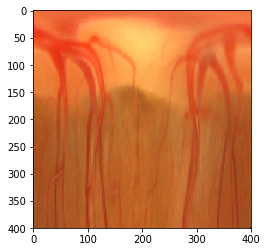

In [52]:
plt.imshow(img[0].squeeze().astype(int))

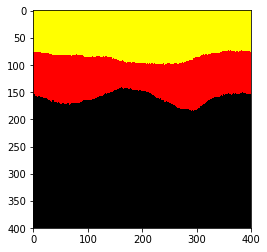

In [53]:
plt.imshow(mask[0].squeeze())